<a href="https://colab.research.google.com/github/Mritunjaysri01/machine_leaning/blob/master/CIFAR10_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
x_train[0].shape

(32, 32, 3)

In [0]:
#plt.imshow(x_train[99])

In [25]:
x_train[0].max()

255

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [31]:
x_test.shape

(10000, 32, 32, 3)

In [32]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
y_cat_test = to_categorical(y_test,10)

In [36]:
y_train[0]

array([6], dtype=uint8)

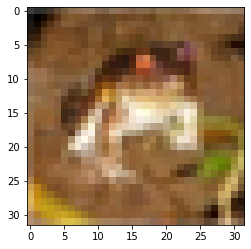

In [37]:
plt.imshow(x_train[0])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

#Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [48]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5055 - accuracy: 0.4568 - val_loss: 1.2366 - val_accuracy: 0.5611
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1877 - accuracy: 0.5802 - val_loss: 1.1185 - val_accuracy: 0.6046
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0340 - accuracy: 0.6355 - val_loss: 1.0367 - val_accuracy: 0.6371
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9239 - accuracy: 0.6769 - val_loss: 1.0074 - val_accuracy: 0.6508
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8402 - accuracy: 0.7055 - val_loss: 0.9852 - val_accuracy: 0.6616
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7580 - accuracy: 0.7338 - val_loss: 0.9705 - val_accuracy: 0.6668
Epoch 7/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6885 - accuracy: 0.7591 - val_loss: 0.9290 -

In [0]:
metrics = pd.DataFrame(model.history.history)

In [50]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.505460,0.45680,1.236627,0.5611
1,1.187674,0.58018,1.118544,0.6046
2,1.034005,0.63548,1.036698,0.6371
3,0.923852,0.67690,1.007369,0.6508
4,0.840159,0.70548,0.985236,0.6616
5,0.757961,0.73382,0.970492,0.6668
6,0.688459,0.75912,0.928974,0.6868
7,0.625475,0.78046,0.984801,0.6799
8,0.567310,0.79952,0.992968,0.6835


In [51]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

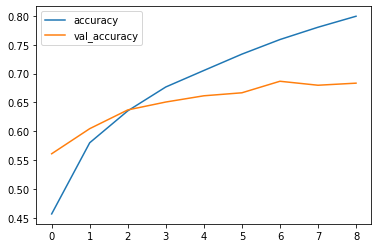

In [52]:
metrics[['accuracy','val_accuracy']].plot()

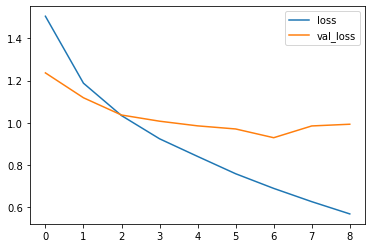

In [53]:
metrics[['loss','val_loss']].plot()

In [54]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9929680824279785, 0.6834999918937683]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [57]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1000
           1       0.77      0.83      0.80      1000
           2       0.49      0.65      0.56      1000
           3       0.57      0.43      0.49      1000
           4       0.69      0.58      0.63      1000
           5       0.57      0.60      0.59      1000
           6       0.80      0.74      0.77      1000
           7       0.74      0.74      0.74      1000
           8       0.79      0.78      0.78      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



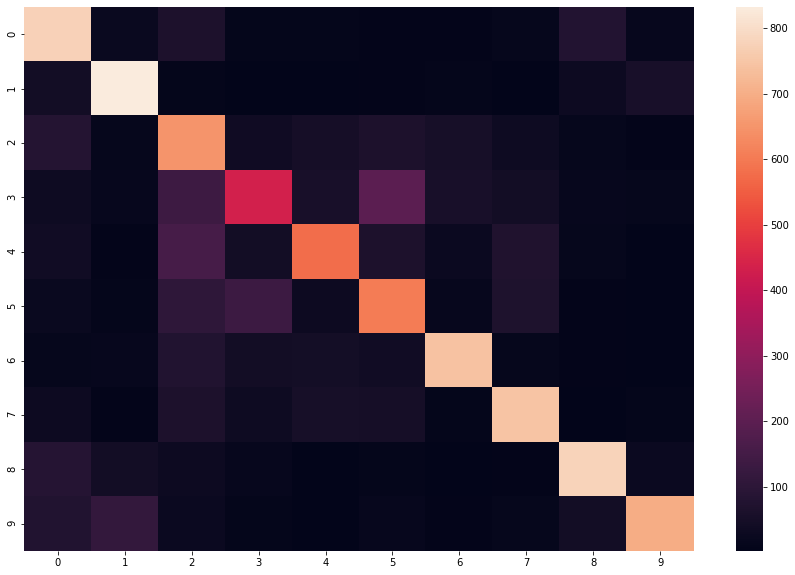

In [60]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,predictions))


In [0]:
my_image = x_test[0]

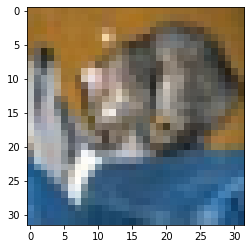

In [63]:
plt.imshow(my_image)

In [64]:
y_test[0]

array([3], dtype=uint8)

In [65]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])

In [0]:
my_image_n = x_test[16]

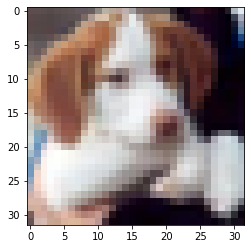

In [69]:
plt.imshow(my_image_n)

In [70]:
y_test[0]

array([3], dtype=uint8)